## Klasifikace obličejů (CNN) - SUR projekt 2025
- Autor: Vojtěch Orava (xorava02)
- FIT VUT Brno 
- použitá metoda: konvoluční neuronová síť

Ke klasifikaci je použita konvoluční neuronová síť.

In [42]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


### Načtení dat a one-hot enkodódování cílových tříd

One hot enkódování je nutné pro korektní porovnání výstupu softmaxu na výstupu sítě s cílovou třídou.

In [43]:
def one_hot(y):
    return tf.one_hot(y, depth=31)

In [44]:
class_names = [str(i) for i in range(1, 32)]  

train_dataset = image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="int",
    class_names=class_names,  
    image_size=(80, 80),
    batch_size=16
)

train_dataset = train_dataset.map(lambda x, y: (x, one_hot(y)))

val_dataset = image_dataset_from_directory(
    "dev",
    labels="inferred",
    label_mode="int",
    class_names=class_names, 
    image_size=(80, 80),
    batch_size=16
)

val_dataset = val_dataset.map(lambda x, y: (x, one_hot(y)))

## testovací dataset (ostrá data)
test_dataset = image_dataset_from_directory(
    "main_data",
    labels=None,
    image_size=(80, 80),
    batch_size=1,
    shuffle = False
)

names = test_dataset.file_paths

#test_dataset = test_dataset.map(lambda x,y : (x, one_hot(y)))


Found 186 files belonging to 31 classes.
Found 62 files belonging to 31 classes.
Found 736 files.


Zobrazení jednoho trénovacího data a příslušné třídy pro kontrolu funkčnosti.

data batch shape:  (16, 80, 80, 3)
label batch shape:  (16, 31)
first label:  tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.], shape=(31,), dtype=float32)


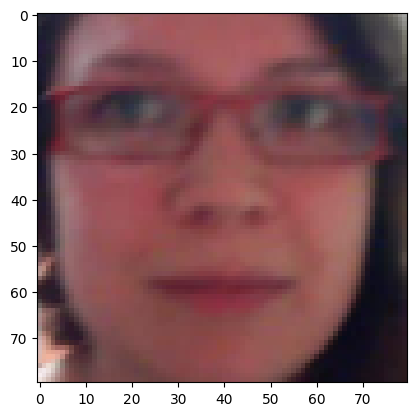

In [45]:
for data_batch, label_batch in train_dataset:
    print("data batch shape: ", data_batch.shape)
    print("label batch shape: ", label_batch.shape)
    print("first label: ", label_batch[0])
    plt.imshow((data_batch[0]/255.0))
    break

### Vytvoření a trénování modelu

Model obsahuje část pro augmentaci dat, částečně se tak vypořádává s nedostatkem trénovacích obrázků.

In [46]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.25),
        keras.layers.RandomZoom(0.25),
        keras.layers.RandomContrast(0.25),
        keras.layers.RandomBrightness(0.25)
    ]
)

In [47]:
# Nepoužité modely CNN jsou zakomentovány
"""
inputs = keras.Input(shape=(80, 80, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(31, activation="softmax")(x)"""

"""inputs = keras.Input(shape=(80, 80, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(31, activation="softmax")(x)"""

inputs = keras.Input(shape=(80, 80, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(31, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.RMSprop(), loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 80, 80, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 78, 78, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 31)             │         7,96

 Total params: 988,383 (3.77 MB)

 Trainable params: 987,423 (3.77 MB)

 Non-trainable params: 960 (3.75 KB)

Trénování modelu - výsledný model je uložen do souboru pro pozdější/opakované použití.

In [48]:
#model.load_weights("convnet.keras")
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet.keras",
        save_best_only=True,
        monitor="val_accuracy"
    )
]

history = model.fit(
    train_dataset,
    epochs=500,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/500


E0000 00:00:1746351576.846918    1074 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_28_1/dropout_20_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.0119 - loss: 8.2972 - val_accuracy: 0.0323 - val_loss: 3.5003
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.0195 - loss: 5.3356 - val_accuracy: 0.0323 - val_loss: 3.9041
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.0742 - loss: 4.1974 - val_accuracy: 0.0323 - val_loss: 4.7620
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.0534 - loss: 4.0314 - val_accuracy: 0.0323 - val_loss: 5.8053
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0586 - loss: 3.6473 - val_accuracy: 0.0323 - val_loss: 6.9072
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0558 - loss: 3.6271 - val_accuracy: 0.0323 - val_loss: 7.4341
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.0856 - loss: 3.4206 - val_accuracy: 0.0323 - val_loss: 7.1012
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.0765 - loss: 3.4847 - val_accuracy: 0.0323 - val_

### Graf trénovací a validační přesnosti a ztrátové funkce
Vykreslíme graf průběhu ztrátové funkce a průběhu přesnosti napříč epochami trénování modelu.

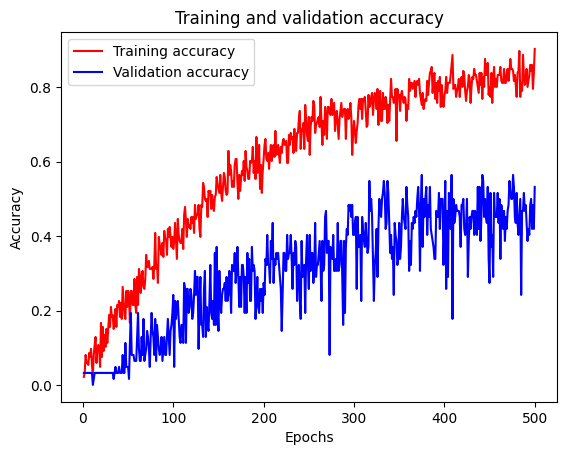

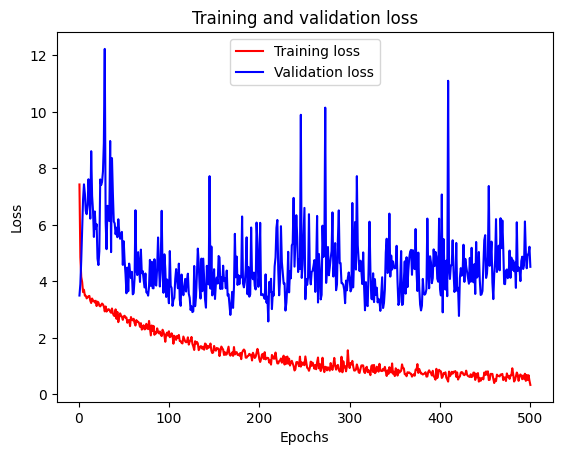

In [54]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Predikce na ostrých datech

Zápis do souboru **image_CNN.txt** ve formátu: *název souboru* MEZERA *tvrdé rozhodnutí* MEZERA *logaritmické pravděpodobnosti*

In [50]:
test_model = keras.models.load_model("convnet.keras")

In [51]:
names = [n.split('/')[-1].split('.')[0] for n in names]

In [52]:
i = 0
with open('image_CNN.txt', 'w') as f:
    for data_batch in test_dataset:
        y_preds = test_model.predict(data_batch)
        
        y_preds_hard = np.argmax(y_preds)
        #print(np.argmax(label_batch, axis=1))
        y_preds_log = tf.math.log(y_preds + 1e-9)[0]
        
        f.write(f'{names[i]} ')
        f.write(f'{y_preds_hard + 1} ')
        
        for j in range(len(y_preds_log) - 1):
            f.write(f'{y_preds_log[j]} ')
            
        f.write(f'{y_preds_log[-1]}\n')
        
        i+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

2025-05-04 11:50:34.002444: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
